In [29]:
import pandas

In [30]:
# Load packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')

from dataset import get_dataset


dfx, dfy = get_dataset('titanic')
X, y= np.array(dfx), np.array(dfy)
# g = sns.PairGrid(dfx)
# g.map(sns.scatterplot)



In [31]:
print ([e for e in dfx])

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']


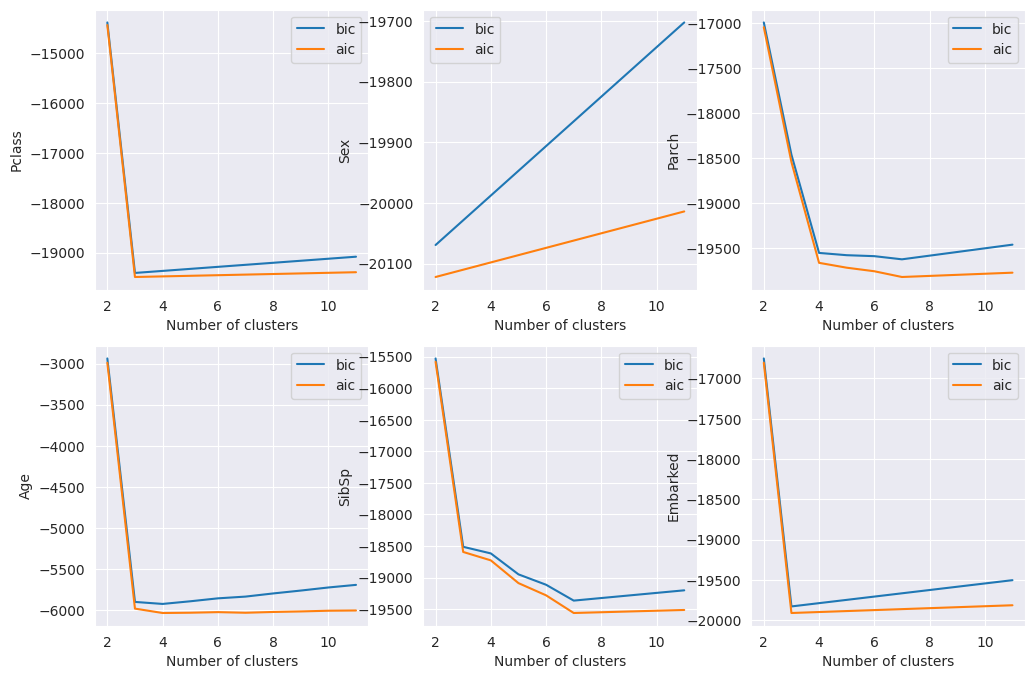

In [32]:
import warnings
warnings.filterwarnings('ignore')
fig, axs = plt.subplots(2, 3)
fig.set_figheight(8)
fig.set_figwidth(12)
axess = [[0,0], [0,1],[1,0],[1,1],[0,2],[1,2]]
n_range= range(2,12)

for idx, e in enumerate(dfx):
    X = np.array(dfx.loc[:,[e,                # Choose your variable names
                           e]])    \
                            .reshape(-1, 2)

    # Determine optimal cluster number with elbow method
    # Determine optimal cluster number with elbow method
    bic_score = []
    aic_score = []

# Loop through the range and fit a model
    for n in n_range:
        gm = GaussianMixture(n_components=n, 
                         random_state=123, 
                         n_init=10)
        gm.fit(X)
    
        bic_score.append(gm.bic(X))
        aic_score.append(gm.aic(X))

    # Show Elbow plot
    axs[axess[idx][0], axess[idx][1]].plot(n_range, bic_score, label='bic')
    axs[axess[idx][0], axess[idx][1]].plot(n_range, aic_score, label='aic')
    axs[axess[idx][0], axess[idx][1]].legend()
    # Show Elbow plot
    #axs[axess[idx][0], axess[idx][1]].plot(range(2, 10), wcss)
    #axs[axess[idx][0], axess[idx][1]].set_title('Elbow Method')                               # Set plot title
    axs[axess[idx][0], axess[idx][1]].set_xlabel('Number of clusters')                        # Set x axis name
    axs[axess[idx][0], axess[idx][1]].set_ylabel(e)      # Set y axis name

In [33]:
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], 180 + angle, color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")

(666, 6) (223, 6) (223,)


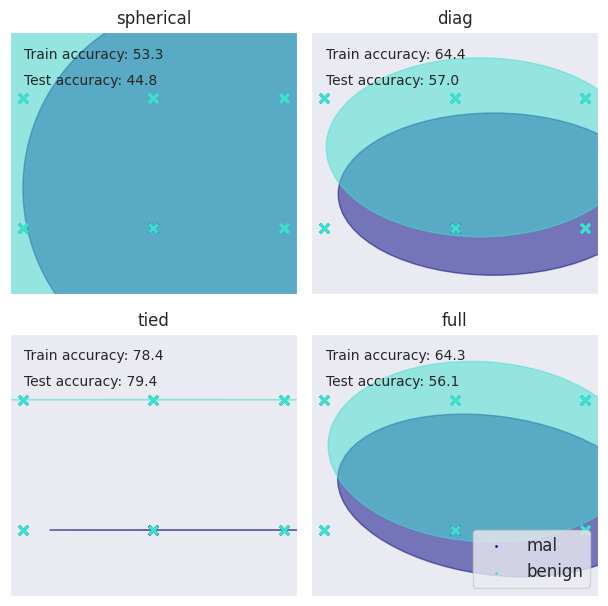

In [37]:
# Try GMMs using different types of covariances.
import matplotlib as mpl
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4)
X, y= np.array(dfx), np.array(dfy)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(X, y)))

colors = ["navy", "turquoise"]
X_train = X[train_index]
y_train = y[train_index]
X_test = X[test_index]
y_test = y[test_index]

print (X_train.shape, X_test.shape, y_test.shape)

n_classes= 2
estimators = {
    cov_type: GaussianMixture(
        n_components=n_classes, covariance_type=cov_type, max_iter=20, random_state=0
    )
    for cov_type in ["spherical", "diag", "tied", "full"]
}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(
    bottom=0.01, top=0.95, hspace=0.15, wspace=0.05, left=0.01, right=0.99
)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array(
        [X_train[y_train == i].mean(axis=0) for i in range(n_classes)]
    )

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = X[y == n]
        plt.scatter(
            data[:, 0], data[:, 1], s=0.8, color=color, label=['mal', 'benign'][n]
        )
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X[y == n]
        plt.scatter(data[:, 0], data[:, 1], marker="x", color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, "Train accuracy: %.1f" % train_accuracy, transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, "Test accuracy: %.1f" % test_accuracy, transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc="lower right", prop=dict(size=12))


plt.show()

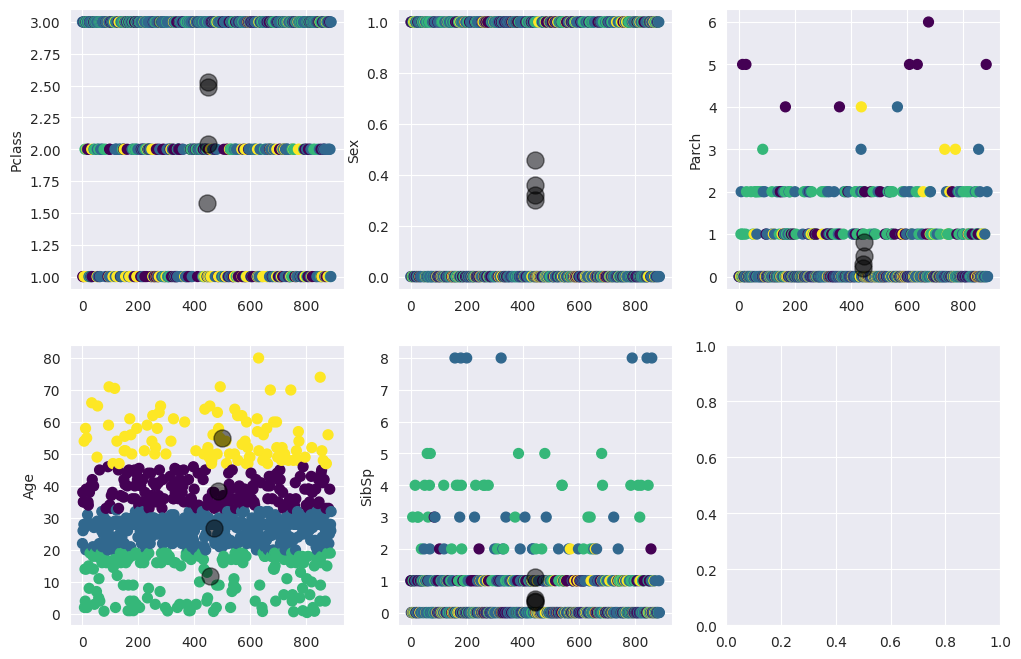

In [33]:
X, y = get_dataset('titanic')
X = np.array(X)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
fig, axs = plt.subplots(2, 3)
fig.set_figheight(8)
fig.set_figwidth(12)
axess = [[0,0], [0,1],[1,0],[1,1],[0,2]]
for idx in range(X.shape[1]-1):
    centers = kmeans.cluster_centers_
    #axs[axess[idx][0], axess[idx][1]].scatter(X[:, idx], X[:, idx+1], c=y_kmeans, s=50, cmap='viridis')
    #axs[axess[idx][0], axess[idx][1]].scatter(centers[:, idx], centers[:, idx+1], c='black', s=150, alpha=0.5)
    axs[axess[idx][0], axess[idx][1]].scatter(range(X.shape[0]), X[:, idx], c=y_kmeans, s=50, cmap='viridis')
    axs[axess[idx][0], axess[idx][1]].scatter(centers[:, idx]+X.shape[0]/2, centers[:, idx], c='black', s=150, alpha=0.5)
    axs[axess[idx][0], axess[idx][1]].set_ylabel(dfx.keys()[idx])

In [30]:
dfx.keys()[0]

'Pclass'